<h2>Categorical Variables and One Hot Encoding</h2>

In [83]:
import warnings
warnings.filterwarnings("ignore")

In [111]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [112]:
df = pd.read_csv("datasets/5_homeprices.csv")
df

,town,area,price
0,monroe township,2600,550000
1,monroe township,3000,565000
2,monroe township,3200,610000
3,monroe township,3600,680000
4,monroe township,4000,725000
5,west windsor,2600,585000
6,west windsor,2800,615000
7,west windsor,3300,650000
8,west windsor,3600,710000
9,robinsville,2600,575000


### Create dummy variables using Pandas

In [113]:
dummies = pd.get_dummies(df.town)
dummies

,monroe township,robinsville,west windsor
0,True,False,False
1,True,False,False
2,True,False,False
3,True,False,False
4,True,False,False
5,False,False,True
6,False,False,True
7,False,False,True
8,False,False,True
9,False,True,False


In [114]:
merged = pd.concat([df,dummies],axis='columns')
merged

,town,area,price,monroe township,robinsville,west windsor
0,monroe township,2600,550000,True,False,False
1,monroe township,3000,565000,True,False,False
2,monroe township,3200,610000,True,False,False
3,monroe township,3600,680000,True,False,False
4,monroe township,4000,725000,True,False,False
5,west windsor,2600,585000,False,False,True
6,west windsor,2800,615000,False,False,True
7,west windsor,3300,650000,False,False,True
8,west windsor,3600,710000,False,False,True
9,robinsville,2600,575000,False,True,False


In [115]:
final = merged.drop(['town'], axis='columns')
final

,area,price,monroe township,robinsville,west windsor
0,2600,550000,True,False,False
1,3000,565000,True,False,False
2,3200,610000,True,False,False
3,3600,680000,True,False,False
4,4000,725000,True,False,False
5,2600,585000,False,False,True
6,2800,615000,False,False,True
7,3300,650000,False,False,True
8,3600,710000,False,False,True
9,2600,575000,False,True,False


### Dummy Variable Trap

When one variable can be directly figured out from the others, we call that **multicollinearity**. For example, if you already know the values of california and georgia, then you can easily tell what new jersey will be (like if both california and georgia are 0, then new jersey must be 1). That’s why these state variables are said to be _multicollinear_.

In such cases, linear regression doesn’t behave properly, so it’s better to drop one of the columns.

Note: scikit-learn automatically handles this issue (the “dummy variable trap”), so your model will still run even if you don’t drop a column. But it’s a good practice to drop one yourself, because not every library will handle it for you.

In [116]:
final = final.drop(['west windsor'], axis='columns')
final

,area,price,monroe township,robinsville
0,2600,550000,True,False
1,3000,565000,True,False
2,3200,610000,True,False
3,3600,680000,True,False
4,4000,725000,True,False
5,2600,585000,False,False
6,2800,615000,False,False
7,3300,650000,False,False
8,3600,710000,False,False
9,2600,575000,False,True


In [117]:
X = final.drop('price', axis='columns')
X

,area,monroe township,robinsville
0,2600,True,False
1,3000,True,False
2,3200,True,False
3,3600,True,False
4,4000,True,False
5,2600,False,False
6,2800,False,False
7,3300,False,False
8,3600,False,False
9,2600,False,True


In [118]:
y = final.price

In [119]:
#create a linear regression model
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [120]:
model.fit(X,y)
print("Model fitted successfully")

Model fitted successfully


In [121]:
model.predict(X) # 2600 sqr ft home in new jersey

array([539709.7398409 , 590468.71640508, 615848.20468716, 666607.18125134,
       717366.15781551, 579723.71533005, 605103.20361213, 668551.92431735,
       706621.15674048, 565396.15136531, 603465.38378844, 628844.87207052,
       692293.59277574])

In [122]:
model.score(X,y)

0.9573929037221873

In [123]:
model.predict([[3400,0,0]]) # 3400 sqr ft home in west windsor

array([681241.66845839])

In [124]:
model.predict([[2800,0,1]]) # 2800 sqr ft home in robbinsville

array([590775.63964739])

<Axes: xlabel='area', ylabel='price'>

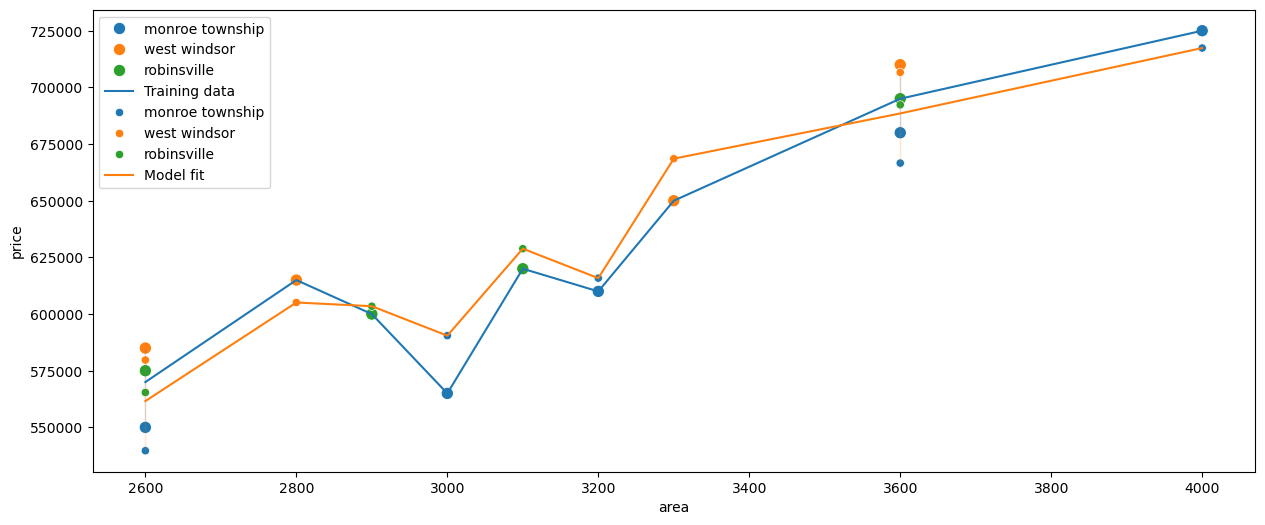

In [135]:
plt.figure(figsize=(15, 6))
sns.scatterplot(x=X['area'], y=y, hue=df['town'], s=80)
sns.lineplot(x=X['area'], y=y, label='Training data')
sns.scatterplot(x=X['area'], y=model.predict(X), hue=df['town'])
sns.lineplot(x=X['area'], y=model.predict(X), label='Model fit')

In [136]:
# Let's examine what happens with multiple prices for same area
print("Areas with multiple prices:")
area_counts = df['area'].value_counts()
multiple_areas = area_counts[area_counts > 1]
print(multiple_areas)

print("\nDetailed view of area 2600:")
area_2600_data = df[df['area'] == 2600][['town', 'area', 'price']]
print(area_2600_data)

print("\nAverage price for area 2600:", area_2600_data['price'].mean())
print("Model prediction for area 2600:", model.predict([[2600, 0, 0]])[0])


Areas with multiple prices:
area
2600    3
3600    3
Name: count, dtype: int64

Detailed view of area 2600:
              town  area   price
0  monroe township  2600  550000
5     west windsor  2600  585000
9      robinsville  2600  575000

Average price for area 2600: 570000.0
Model prediction for area 2600: 579723.7153300465


In [ ]:
# Different ways to visualize multiple prices for same area

plt.figure(figsize=(15, 5))

# Method 1: Show all data points with jitter (spread them slightly)
plt.subplot(1, 3, 1)
sns.scatterplot(x=df['area'], y=df['price'], hue=df['town'], s=80, alpha=0.7)
plt.title("All Data Points (shows multiple prices per area)")
plt.xlabel("Area (sq ft)")
plt.ylabel("Price ($)")

# Method 2: Show averages with error bars
plt.subplot(1, 3, 2)
area_avg = df.groupby('area')['price'].agg(['mean', 'std']).reset_index()
plt.errorbar(area_avg['area'], area_avg['mean'], yerr=area_avg['std'], 
             fmt='o-', capsize=5, label='Average ± Std Dev')
plt.title("Average Prices with Error Bars")
plt.xlabel("Area (sq ft)")
plt.ylabel("Price ($)")
plt.legend()

# Method 3: Box plot to show distribution
plt.subplot(1, 3, 3)
sns.boxplot(x=df['area'], y=df['price'])
plt.title("Price Distribution by Area")
plt.xlabel("Area (sq ft)")
plt.ylabel("Price ($)")

plt.tight_layout()
plt.show()


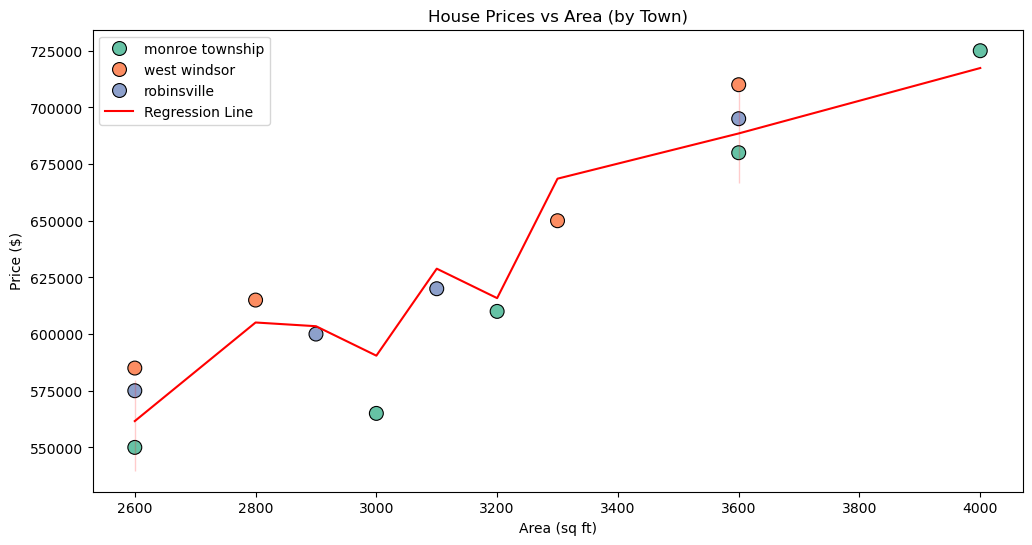

In [133]:
plt.figure(figsize=(12,6))

# Scatterplot of the raw data (color-coded by town)
sns.scatterplot(
    x=X['area'],
    y=y,
    hue=df['town'],
    palette="Set2",
    s=100,
    edgecolor="black"
)

# Regression line (predicted values)
sns.lineplot(
    x=X['area'],
    y=model.predict(X),
    color="red",
    label="Regression Line"
)

plt.title("House Prices vs Area (by Town)")
plt.xlabel("Area (sq ft)")
plt.ylabel("Price ($)")
plt.legend()
plt.show()


<h2 style='color:purple'>Using sklearn OneHotEncoder</h2>

First step is to use label encoder to convert town names into numbers

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
dfle = df
dfle.town = le.fit_transform(dfle.town)
dfle

,town,area,price
0,0,2600,550000
1,0,3000,565000
2,0,3200,610000
3,0,3600,680000
4,0,4000,725000
5,2,2600,585000
6,2,2800,615000
7,2,3300,650000
8,2,3600,710000
9,1,2600,575000


In [ ]:
X = dfle[['town','area']].values

In [ ]:
X

array([[   0, 2600],
       [   0, 3000],
       [   0, 3200],
       [   0, 3600],
       [   0, 4000],
       [   2, 2600],
       [   2, 2800],
       [   2, 3300],
       [   2, 3600],
       [   1, 2600],
       [   1, 2900],
       [   1, 3100],
       [   1, 3600]], dtype=int64)

In [ ]:
y = dfle.price.values
y

array([550000, 565000, 610000, 680000, 725000, 585000, 615000, 650000,
       710000, 575000, 600000, 620000, 695000], dtype=int64)

Now use one hot encoder to create dummy variables for each of the town

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
ct = ColumnTransformer([('town', OneHotEncoder(), [0])], remainder = 'passthrough')

In [ ]:
X = ct.fit_transform(X)
X

array([[1.0e+00, 0.0e+00, 0.0e+00, 2.6e+03],
       [1.0e+00, 0.0e+00, 0.0e+00, 3.0e+03],
       [1.0e+00, 0.0e+00, 0.0e+00, 3.2e+03],
       [1.0e+00, 0.0e+00, 0.0e+00, 3.6e+03],
       [1.0e+00, 0.0e+00, 0.0e+00, 4.0e+03],
       [0.0e+00, 0.0e+00, 1.0e+00, 2.6e+03],
       [0.0e+00, 0.0e+00, 1.0e+00, 2.8e+03],
       [0.0e+00, 0.0e+00, 1.0e+00, 3.3e+03],
       [0.0e+00, 0.0e+00, 1.0e+00, 3.6e+03],
       [0.0e+00, 1.0e+00, 0.0e+00, 2.6e+03],
       [0.0e+00, 1.0e+00, 0.0e+00, 2.9e+03],
       [0.0e+00, 1.0e+00, 0.0e+00, 3.1e+03],
       [0.0e+00, 1.0e+00, 0.0e+00, 3.6e+03]])

In [ ]:
X = X[:,1:]

In [ ]:
X

array([[0.0e+00, 0.0e+00, 2.6e+03],
       [0.0e+00, 0.0e+00, 3.0e+03],
       [0.0e+00, 0.0e+00, 3.2e+03],
       [0.0e+00, 0.0e+00, 3.6e+03],
       [0.0e+00, 0.0e+00, 4.0e+03],
       [0.0e+00, 1.0e+00, 2.6e+03],
       [0.0e+00, 1.0e+00, 2.8e+03],
       [0.0e+00, 1.0e+00, 3.3e+03],
       [0.0e+00, 1.0e+00, 3.6e+03],
       [1.0e+00, 0.0e+00, 2.6e+03],
       [1.0e+00, 0.0e+00, 2.9e+03],
       [1.0e+00, 0.0e+00, 3.1e+03],
       [1.0e+00, 0.0e+00, 3.6e+03]])

In [ ]:
model.fit(X,y)

LinearRegression()

In [ ]:
model.predict([[0,1,3400]]) # 3400 sqr ft home in west windsor

array([681241.6684584])

In [ ]:
model.predict([[1,0,2800]]) # 2800 sqr ft home in robbinsville

array([590775.63964739])

<h2 style='color:green'>Exercise</h2>

At the same level as this notebook on github, there is an Exercise folder that contains carprices.csv.
This file has car sell prices for 3 different models. First plot data points on a scatter plot chart
to see if linear regression model can be applied. If yes, then build a model that can answer
following questions,

**1) Predict price of a mercedez benz that is 4 yr old with mileage 45000**

**2) Predict price of a BMW X5 that is 7 yr old with mileage 86000**

**3) Tell me the score (accuracy) of your model. (Hint: use LinearRegression().score())**